In [140]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 align="center"> Gene Selection </h1>
<h3 align="center"> Christine Zhang </h3>

---

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
entrez_pd = pd.read_csv('../EntrezID.txt', skiprows = [0], sep ="\t", names = ["Hugo", "Symbol", "Entrez_ID"]) 
entrez = entrez_pd.as_matrix()
entrez_pd.head()

,Hugo,Symbol,Entrez_ID
0,HGNC:5,A1BG,1.0
1,HGNC:37133,A1BG-AS1,503538.0
2,HGNC:24086,A1CF,29974.0
3,HGNC:6,A1S9T~withdrawn,NaN
4,HGNC:7,A2M,2.0


In [3]:
gene_lst_pd = pd.read_csv("gene_list.txt", names=["Genes"])
gene_lst = gene_lst_pd.as_matrix()
gene_lst_clean = [i for [i] in gene_lst]
print np.shape(gene_lst)
gene_lst_pd.head()

(118, 1)


,Genes
0,CDKN2A-AS1
1,CDKN2A
2,PRKN
3,TP53BP1
4,AKT1


In [4]:
gene_entrez_id_lst = []
symbol_lst = list(entrez[:,1])
for gene in gene_lst:
    if gene in symbol_lst:
        gene_entrez_id_lst.append(entrez[symbol_lst.index(gene),2])
    else:
        gene_entrez_id_lst.append(-1)

In [5]:
gene_lst_pd["Entrez_id"] = gene_entrez_id_lst
gene_lst_pd.head()

,Genes,Entrez_id
0,CDKN2A-AS1,51198.0
1,CDKN2A,1029.0
2,PRKN,5071.0
3,TP53BP1,7158.0
4,AKT1,207.0


In [6]:
file_name = "datasets_498/gene_lst_pd"
with open(file_name,'wb') as my_file_obj:
    pickle.dump(gene_lst_pd,my_file_obj)

### All Data

---

In [6]:
file_name = "auc_pd"
file_object = open(file_name,'r')  
auc_pd = pickle.load(file_object)
auc_pd.head()

,Cclid,Cellline,Sites,Histology,Subhistology,Culture,SNP,AUC
0,3,5637,urinary_tract,carcinoma,NS,RPMI001,SNP-matched-reference,2.473
1,7,22RV1,prostate,carcinoma,NS,RPMI001,SNP-matched-reference,2.142
2,10,42MGBA,central_nervous_system,glioma,astrocytoma_Grade_IV,RPMIMEM001,SNP-matched-reference,3.380
3,15,647V,urinary_tract,carcinoma,transitional_cell_carcinoma,DMEM011,SNP-matched-reference,3.374
4,16,769P,kidney,carcinoma,clear_cell_renal_cell_carcinoma,RPMI001,SNP-matched-reference,3.123


In [7]:
file_name = "master_auc"
file_object = open(file_name,'r')  
master_auc_pd = pickle.load(file_object)
master_auc = master_auc_pd.as_matrix()
master_auc = master_auc.reshape([472,1])
print np.shape(master_auc)
master_auc_pd.head(n=10)

(472, 1)


3     2.473
7     2.142
10    3.380
15    3.374
16    3.123
19    3.779
21    3.471
22    2.625
23    4.677
25    2.751
Name: AUC, dtype: float64

In [8]:
file_name = "master_no_auc"
file_object = open(file_name,'r')  
master_no_auc_pd = pickle.load(file_object)
print np.shape(master_no_auc_pd)
master_no_auc_pd.head()

(472, 24704)


Entrez_id,1,503538,29974,2,144571,144568,3,53947,51146,100506677,...,6608_y,8522_y,2885_y,2161_y,27255_y,23072_y,6725_y,9149_y,6241_y,8301_y
3,-0.0324,-0.0324,-0.4928,-0.0657,-0.0657,-0.0657,-0.0657,-0.0390,0.0518,0.4291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.0762,-0.0762,-0.0025,0.4486,0.4486,0.4486,0.4486,-0.0574,-0.0303,-0.0712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0346,0.0346,-0.0522,-0.3816,-0.3816,-0.3816,-0.3816,-0.0155,-0.2675,-0.7758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.2934,0.2934,-0.3050,0.1603,0.1603,0.1603,0.1603,-0.2881,0.2831,0.0613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0463,0.0463,0.0436,-0.0112,-0.0112,-0.0112,-0.0112,0.0834,0.0468,0.0528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# encode categorical variables
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array

# apply one hot encoding
def one_hot (dataframe): 
    sites_lst = []
    for index, val in enumerate(auc_pd["Cclid"]):
        if str(val) in list(dataframe.index):
            sites_lst.append(auc_pd.loc[index,"Sites"])
    dataframe.loc[:,"Sites"] = sites_lst
    
    # Categorical columns for use in one-hot encoder
    categorical = (dataframe.dtypes.values != np.dtype('float64'))

    # Encode all labels
    dataframe = dataframe.apply(encode_categorical)
    dataframe_np = dataframe.as_matrix()
    return dataframe_np, dataframe

# apply binary one hot encoding
def binary_one_hot (dataframe): 
    sites_lst = []
    for index, val in enumerate(auc_pd["Cclid"]):
        if str(val) in list(dataframe.index):
            sites_lst.append(auc_pd.loc[index,"Sites"])
    dataframe["Sites"] = sites_lst
    
    dataframe_binary_pd = pd.get_dummies(dataframe)
    dataframe_binary = dataframe_binary_pd.as_matrix()

    return dataframe_binary, dataframe_binary_pd

In [10]:
def select_columns(inttotest, dataframe):
    selected_pd = dataframe[[col for col in dataframe.columns if (str(col).startswith(str(inttotest)+"_") or str(col) == str(inttotest))]].head()
    return selected_pd.columns.values

full_column_lst = []
for each_int in gene_entrez_id_lst:
    selected_columns = select_columns(int(each_int), master_no_auc_pd)
    full_column_lst.append(selected_columns)   
full_column_lst = np.concatenate(full_column_lst)

In [11]:
master_no_auc_selected_pd = master_no_auc_pd.loc[:,master_no_auc_pd.columns.intersection(full_column_lst)]
master_no_auc_onehot, master_no_auc_onehot_pd = one_hot (master_no_auc_selected_pd)
master_no_auc_binary, master_no_auc_binary_pd = one_hot (master_no_auc_selected_pd)

/Users/christine/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/christine/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
linreg = LinearRegression()
svr_rbf = SVR(kernel = "rbf")
svr_lin = SVR(kernel = "linear")
rf = RandomForestRegressor()
lasso = linear_model.Lasso(alpha=0.1)
ridge = linear_model.Ridge(alpha=0.1)

# test naive models
def test_model (model):
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    r2 = clf.score(x_test, y_test)
    return y_pred, r2

def draw_plot (ax, y_pred, title, y_score):
    y_pred = y_pred.flatten()
    ax.scatter(y_pred, y_test)
    ax.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 1))(np.unique(y_pred)))
    ax.set_title("%s r2 accuracy: %s" %(title, round(y_score, 3)))
    ax.set_xlabel("Predicted AUC")
    ax.set_ylabel("Actual AUC")
    return plt

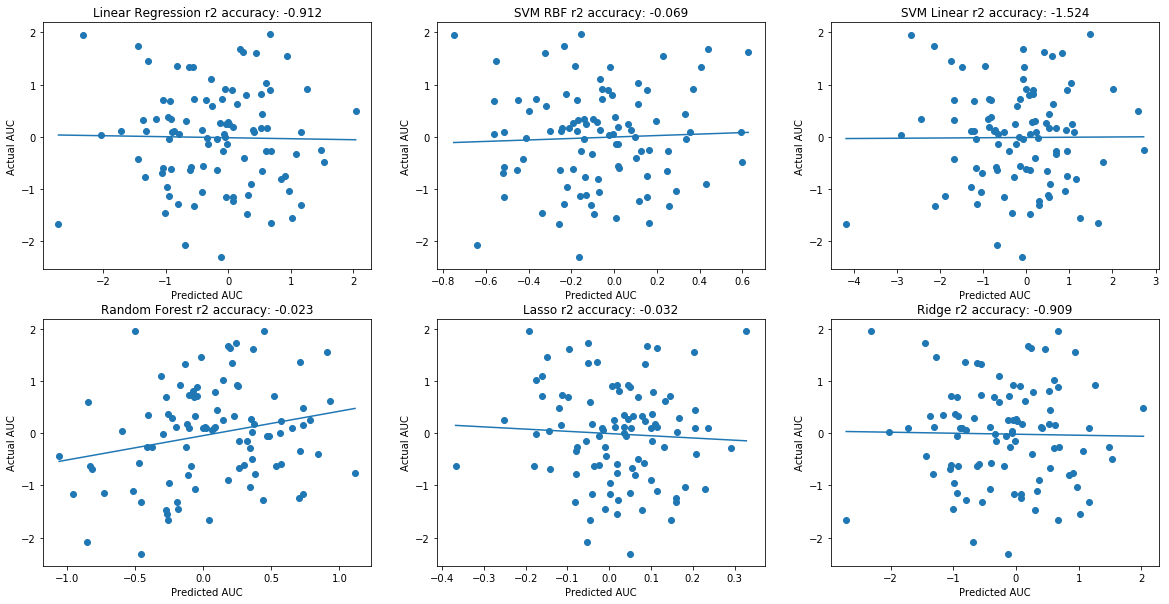

In [13]:
master_no_auc_selected_scaled = preprocessing.scale(master_no_auc_onehot)
master_auc_scaled = preprocessing.scale(master_auc)

x_train, x_test, y_train, y_test = train_test_split(master_no_auc_selected_scaled, master_auc_scaled, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred, r2_linreg = test_model (linreg)
svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
svr_lin_y_pred, r2_svr_lin = test_model (svr_lin)
rf_y_pred, r2_rf = test_model (rf)
y_pred_lasso, r2_lasso = test_model (lasso)
y_pred_ridge, r2_ridge = test_model (ridge)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred, "Linear Regression", r2_linreg)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred, "SVM RBF", r2_svr_rbf)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred, "SVM Linear", r2_svr_lin)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred, "Random Forest", r2_rf)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso, "Lasso", r2_lasso)
ax[1,2] = draw_plot (ax[1,2], y_pred_ridge, "Ridge", r2_ridge)

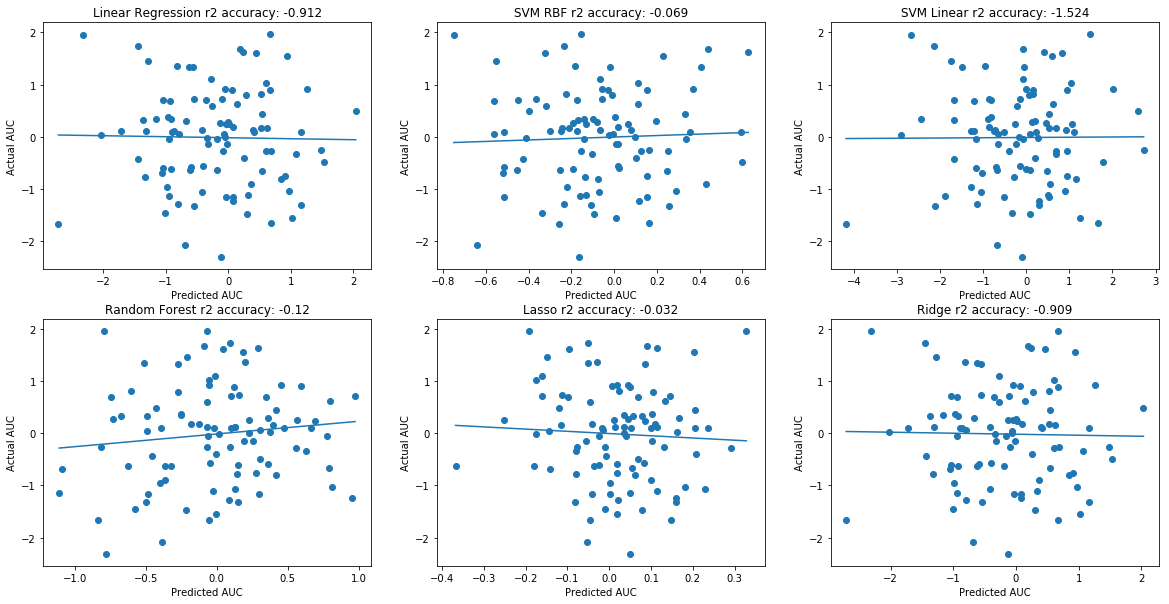

In [14]:
master_no_auc_selected_scaled = preprocessing.scale(master_no_auc_binary)
master_auc_scaled = preprocessing.scale(master_auc)

x_train, x_test, y_train, y_test = train_test_split(master_no_auc_selected_scaled, master_auc_scaled, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_binary, r2_linreg_binary = test_model (linreg)
svr_rbf_y_pred_binary, r2_svr_rbf_binary = test_model (svr_rbf)
svr_lin_y_pred_binary, r2_svr_lin_binary = test_model (svr_lin)
rf_y_pred_binary, r2_rf_binary = test_model (rf)
y_pred_lasso_binary, r2_lasso_binary = test_model (lasso)
y_pred_ridge_binary, r2_ridge_binary = test_model (ridge)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_binary, "Linear Regression", r2_linreg_binary)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_binary, "SVM RBF", r2_svr_rbf_binary)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_binary, "SVM Linear", r2_svr_lin_binary)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_binary, "Random Forest", r2_rf_binary)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_binary, "Lasso", r2_lasso_binary)
ax[1,2] = draw_plot (ax[1,2], y_pred_ridge_binary, "Ridge", r2_ridge_binary)

### Just Mutation

---

In [15]:
file_name = "mutation_pd"
file_object = open(file_name,'r')  
mutation_pd = pickle.load(file_object)
mutation_pd.head()

Entrez_id,890,4478,2317,6790,120892,4342,4739,6498,8313,10298,...,6608,8522,2885,2161,27255,23072,6725,9149,6241,8301
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
mutation_selected_pd = mutation_pd.loc[:,mutation_pd.columns.intersection(gene_lst_pd)]
mutation_onehot, mutation_onehot_pd = one_hot (mutation_selected_pd)
mutation_binary, mutation_binary_pd = one_hot (mutation_selected_pd)

/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


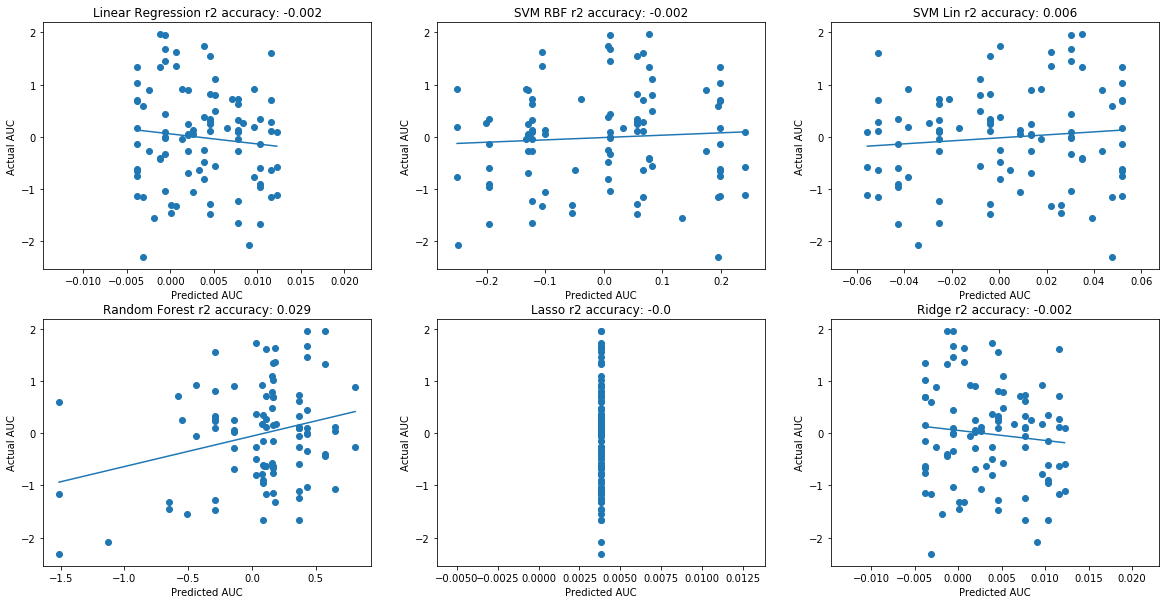

In [21]:
just_mutation_scaled = preprocessing.scale(mutation_onehot_pd)

x_train, x_test, y_train, y_test = train_test_split(just_mutation_scaled, master_auc_scaled, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_mut, r2_linreg_mut = test_model (linreg)
svr_rbf_y_pred_mut, r2_svr_rbf_mut = test_model (svr_rbf)
svr_lin_y_pred_mut, r2_svr_lin_mut = test_model (svr_lin)
rf_y_pred_mut, r2_rf_mut = test_model (rf)
y_pred_lasso_mut, r2_lasso_mut = test_model (lasso)
y_pred_ridge_mut, r2_ridge_mut = test_model (ridge)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_mut, "Linear Regression", r2_linreg_mut)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_mut, "SVM RBF", r2_svr_rbf_mut)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_mut, "SVM Lin", r2_svr_lin_mut)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_mut, "Random Forest", r2_rf_mut)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_mut, "Lasso", r2_lasso_mut)
ax[1,2] = draw_plot (ax[1,2], y_pred_ridge_mut, "Ridge", r2_ridge_mut)

/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


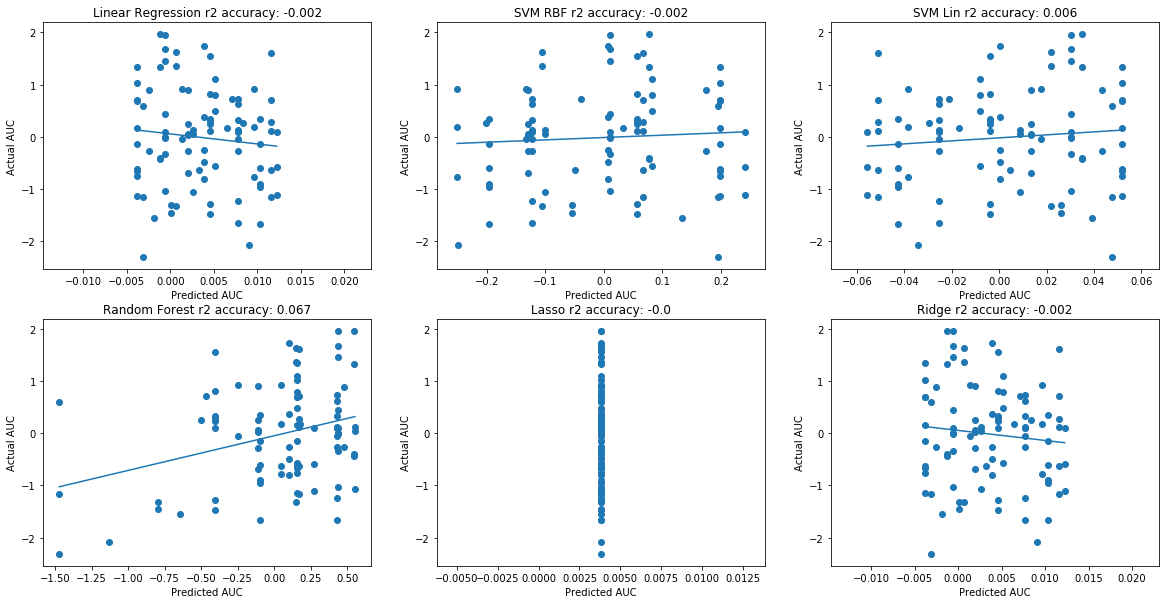

In [22]:
just_mutation_scaled = preprocessing.scale(mutation_binary_pd)

x_train, x_test, y_train, y_test = train_test_split(just_mutation_scaled, master_auc_scaled, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_mut_binary, r2_linreg_mut_binary = test_model (linreg)
svr_rbf_y_pred_mut_binary, r2_svr_rbf_mut_binary = test_model (svr_rbf)
svr_lin_y_pred_mut_binary, r2_svr_lin_mut_binary = test_model (svr_lin)
rf_y_pred_mut_binary, r2_rf_mut_binary = test_model (rf)
y_pred_lasso_mut_binary, r2_lasso_mut_binary = test_model (lasso)
y_pred_ridge_mut_binary, r2_ridge_mut_binary = test_model (ridge)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_mut_binary, "Linear Regression", r2_linreg_mut_binary)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_mut_binary, "SVM RBF", r2_svr_rbf_mut_binary)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_mut_binary, "SVM Lin", r2_svr_lin_mut_binary)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_mut_binary, "Random Forest", r2_rf_mut_binary)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_mut_binary, "Lasso", r2_lasso_mut_binary)
ax[1,2] = draw_plot (ax[1,2], y_pred_ridge_mut_binary, "Ridge", r2_ridge_mut_binary)

### Just Copy Number

---

In [25]:
file_name = "copynum_pd"
file_object = open(file_name,'r')  
copynum_clean_pd = pickle.load(file_object)
print np.shape(copynum_clean_pd)
copynum_pd = copynum_clean_pd

(472, 23174)


In [26]:
copynum_selected_pd = copynum_pd.loc[:,copynum_pd.columns.intersection(gene_lst_pd)]
cn_onehot, cn_onehot_pd = one_hot (copynum_selected_pd)
cn_binary, cn_binary_pd = one_hot (copynum_selected_pd)

/Users/christine/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


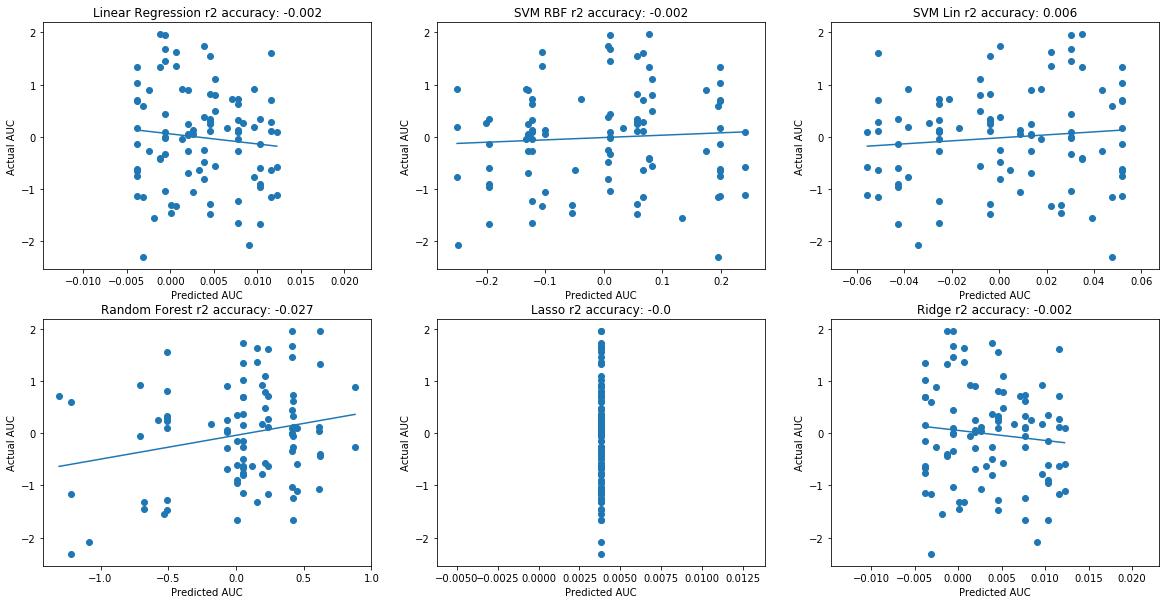

In [27]:
cn_scaled = preprocessing.scale(cn_onehot)

x_train, x_test, y_train, y_test = train_test_split(cn_scaled, master_auc_scaled, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_cn, r2_linreg_cn = test_model (linreg)
svr_rbf_y_pred_cn, r2_svr_rbf_cn = test_model (svr_rbf)
svr_lin_y_pred_cn, r2_svr_lin_cn = test_model (svr_lin)
rf_y_pred_cn, r2_rf_cn = test_model (rf)
y_pred_lasso_cn, r2_lasso_cn = test_model (lasso)
y_pred_ridge_cn, r2_ridge_cn = test_model (ridge)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_cn, "Linear Regression", r2_linreg_cn)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_cn, "SVM RBF", r2_svr_rbf_cn)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_cn, "SVM Lin", r2_svr_lin_cn)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_cn, "Random Forest", r2_rf_cn)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_cn, "Lasso", r2_lasso_cn)
ax[1,2] = draw_plot (ax[1,2], y_pred_ridge_cn, "Ridge", r2_ridge_cn)

/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


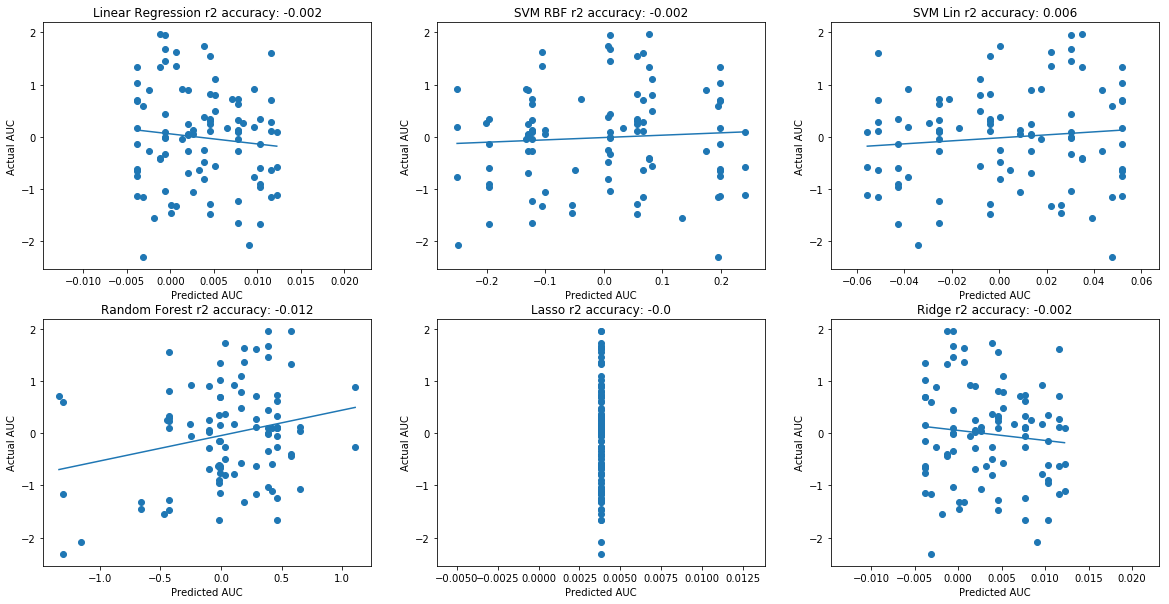

In [28]:
cn_scaled = preprocessing.scale(cn_binary)

x_train, x_test, y_train, y_test = train_test_split(cn_scaled, master_auc_scaled, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_cn_binary, r2_linreg_cn_binary = test_model (linreg)
svr_rbf_y_pred_cn_binary, r2_svr_rbf_cn_binary = test_model (svr_rbf)
svr_lin_y_pred_cn_binary, r2_svr_lin_cn_binary = test_model (svr_lin)
rf_y_pred_cn_binary, r2_rf_cn_binary = test_model (rf)
y_pred_lasso_cn_binary, r2_lasso_cn_binary = test_model (lasso)
y_pred_ridge_cn_binary, r2_ridge_cn_binary = test_model (ridge)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_cn_binary, "Linear Regression", r2_linreg_cn_binary)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_cn_binary, "SVM RBF", r2_svr_rbf_cn_binary)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_cn_binary, "SVM Lin", r2_svr_lin_cn_binary)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_cn_binary, "Random Forest", r2_rf_cn_binary)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_cn_binary, "Lasso", r2_lasso_cn_binary)
ax[1,2] = draw_plot (ax[1,2], y_pred_ridge_cn_binary, "Ridge", r2_ridge_cn_binary)

In [29]:
score_df = pd.DataFrame({'Linear Regression': [r2_linreg, r2_linreg_binary, r2_linreg_mut, r2_linreg_mut_binary, r2_linreg_cn, r2_linreg_cn_binary],
                         'SVM RBF': [r2_svr_rbf, r2_svr_rbf_binary, r2_svr_rbf_mut, r2_svr_rbf_mut_binary, r2_svr_rbf_cn, r2_svr_rbf_cn_binary],
                         'SVM Linear': [r2_svr_lin, r2_svr_lin_binary, r2_svr_lin_mut, r2_svr_lin_mut_binary, r2_svr_lin_cn, r2_svr_lin_cn_binary],
                         'Random Forest': [r2_rf, r2_rf_binary, r2_rf_mut, r2_rf_mut_binary, r2_rf_cn, r2_rf_cn_binary],
                         'Lasso': [r2_lasso, r2_lasso_binary, r2_lasso_mut, r2_lasso_mut_binary, r2_lasso_cn, r2_lasso_cn_binary],
                         'Ridge': [r2_ridge, r2_ridge_binary, r2_ridge_mut, r2_ridge_mut_binary, r2_ridge_cn, r2_ridge_cn_binary]}, 
                       index=["All", "All Binary", "Mutation Only","Mutation Binary", "Copy Number Only", "Copy Number Binary"])
score_df

,Lasso,Linear Regression,Random Forest,Ridge,SVM Linear,SVM RBF
All,-0.031970,-0.911908,-0.022660,-0.909200,-1.524269,-0.068879
All Binary,-0.031970,-0.911908,-0.120083,-0.909200,-1.524269,-0.068879
Mutation Only,-0.000406,-0.001512,0.028727,-0.001512,0.005683,-0.002334
Mutation Binary,-0.000406,-0.001512,0.067258,-0.001512,0.005683,-0.002334
Copy Number Only,-0.000406,-0.001512,-0.026747,-0.001512,0.005683,-0.002334
Copy Number Binary,-0.000406,-0.001512,-0.012407,-0.001512,0.005683,-0.002334


### With Gene Expression

---

In [30]:
file_name = "datasets/gene_exp_bin_pd"
file_object = open(file_name,'r')  
gene_exp_bin_pd = pickle.load(file_object)

In [31]:
gene_exp_pd = gene_exp_bin_pd.drop(gene_exp_bin_pd.loc[:,gene_exp_bin_pd.columns.str.contains("Sites")==True].columns, axis = 1)
gene_exp_pd.head()

,100009676,10000,10001,10002,10003,100048912,10004,10005,10006,10007,...,9989,998,9990,9991,9992,9993,9994,9997,999,9
3,5.979812,6.595651,9.663415,4.040661,4.159523,4.099417,4.518963,8.236260,8.543386,10.146590,...,10.824800,5.366379,6.102796,7.611540,4.590955,7.164869,7.092268,9.638273,8.372508,7.915253
7,6.079415,4.521625,8.845639,3.768181,4.044822,4.151676,4.201540,7.922227,9.147535,8.564433,...,8.963671,5.304978,5.231049,8.704089,4.505268,6.679857,9.262698,10.335640,9.852547,10.535870
10,5.373842,6.631749,10.001350,3.610522,4.242035,3.859894,4.561051,8.697279,8.833257,8.895942,...,10.669690,6.068712,5.735501,8.380994,4.505418,6.530644,8.844877,9.305898,4.312173,8.105601
15,6.025009,7.510764,9.289334,3.685390,3.656942,4.138587,4.599801,8.492029,9.341341,9.578695,...,10.812790,5.128864,6.746001,8.342509,4.533303,6.942694,8.538819,8.043184,11.278580,8.478392
16,5.444892,7.544216,8.715909,4.173643,3.663081,4.069507,4.523500,7.735855,9.247934,10.152180,...,9.648020,4.942413,5.591168,8.207547,4.719897,6.646730,8.307294,9.801101,4.339788,8.283828


In [32]:
def PCA_apply (dataframe):
    dataframe = dataframe.transpose()
    master_cclid = dataframe.as_matrix()
    pca = PCA(n_components=20)
    scaled_data = preprocessing.scale(master_cclid)
    pca.fit(scaled_data)    
    pca.transform(scaled_data)
    pca_components_pd = pd.DataFrame(data = pca.components_, columns = dataframe.columns.values).transpose()
    pca_components = pca_components_pd.as_matrix()
    print "Amount of Variance explained by each component: ", pca.explained_variance_ratio_
    print "Total Variance Captured", np.sum(pca.explained_variance_ratio_)
    return pca_components

gene_exp_components = PCA_apply(gene_exp_pd)

Amount of Variance explained by each component:  [ 0.8750092   0.01464005  0.00755835  0.00399892  0.00353293  0.00311883
  0.00270719  0.00240871  0.00209823  0.00191912  0.0016035   0.00150193
  0.00139     0.00122408  0.00112347  0.00109077  0.00102614  0.00098777
  0.00095807  0.00089971]
Total Variance Captured 0.928796967085


In [33]:
master_no_auc_selected_pd = master_no_auc_selected_pd.drop("Sites", axis = 1)
master_no_auc_selected_clean_pd = master_no_auc_selected_pd.drop("895")
entrez_id_lst = master_no_auc_selected_clean_pd.index
master_no_auc_selected_clean_pd.head()

Entrez_id,51198,1029_x,1029_y,5071,7158_x,7158_y,207_x,207_y,472_x,472_y,...,5291_y,3265_x,3265_y,3845_x,3845_y,4893_x,4893_y,142_x,142_y,10038
3,0.3753,0.3753,0.0,0.0629,-0.0074,0.0,-0.0125,0.0,0.0125,0.0,...,0.0,0.3525,0.0,0.0012,0.0,0.0792,0.0,0.0647,0.0,-0.0170
7,-0.0383,-0.0383,0.0,-1.1599,-0.0705,1.0,-0.0806,0.0,-0.0760,0.0,...,0.0,-0.0453,0.0,0.4751,0.0,-0.0492,0.0,0.5002,0.0,-0.0268
10,-2.7112,-2.7112,0.0,-4.5481,0.1218,0.0,-0.1531,0.0,0.3264,0.0,...,0.0,-0.1469,0.0,-0.3030,0.0,0.5844,0.0,-0.2856,0.0,0.3687
15,-0.2346,-0.2346,0.0,-0.3391,-0.2767,0.0,-0.3490,0.0,0.3385,0.0,...,0.0,0.2474,0.0,0.2892,0.0,0.3228,0.0,0.3262,0.0,-0.3164
16,-0.8478,-0.8478,0.0,0.0517,0.0557,0.0,-0.8636,0.0,-0.8866,0.0,...,0.0,0.1084,0.0,0.0269,0.0,0.0555,0.0,0.5440,0.0,-0.8966


In [34]:
auc_lst = []
for index, cclid in enumerate(auc_pd["Cclid"]):
    if str(cclid) in entrez_id_lst:
        auc_lst.append(auc_pd["AUC"][index])
auc_lst = np.array(auc_lst)
auc_lst = auc_lst.reshape([471,1])
print np.shape(auc_lst)

(471, 1)


In [35]:
gene_exp_components_trans = gene_exp_components.transpose()
for index, each in enumerate(gene_exp_components_trans):
    master_no_auc_selected_clean_pd["PCA_" + str(index)] = each
master_no_auc_selected_clean = master_no_auc_selected_clean_pd.as_matrix()
master_no_auc_selected_clean_pd.head()

Entrez_id,51198,1029_x,1029_y,5071,7158_x,7158_y,207_x,207_y,472_x,472_y,...,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19
3,0.3753,0.3753,0.0,0.0629,-0.0074,0.0,-0.0125,0.0,0.0125,0.0,...,0.062576,0.122087,-0.079477,-0.005585,-0.009294,0.022607,-0.025505,-0.014444,-0.005492,-0.033660
7,-0.0383,-0.0383,0.0,-1.1599,-0.0705,1.0,-0.0806,0.0,-0.0760,0.0,...,-0.051330,0.000692,-0.014528,0.052465,0.004170,0.019753,-0.022967,-0.041199,-0.029430,0.029110
10,-2.7112,-2.7112,0.0,-4.5481,0.1218,0.0,-0.1531,0.0,0.3264,0.0,...,-0.018456,0.026925,0.021406,0.024911,0.024596,-0.012696,-0.013134,0.004239,-0.066887,-0.004030
15,-0.2346,-0.2346,0.0,-0.3391,-0.2767,0.0,-0.3490,0.0,0.3385,0.0,...,0.000810,0.078054,-0.005038,-0.060271,-0.056469,0.007406,0.013539,0.030882,-0.045306,0.030655
16,-0.8478,-0.8478,0.0,0.0517,0.0557,0.0,-0.8636,0.0,-0.8866,0.0,...,-0.103877,0.040934,-0.084727,-0.029453,0.005491,-0.086212,0.039182,-0.034824,0.038609,-0.059071


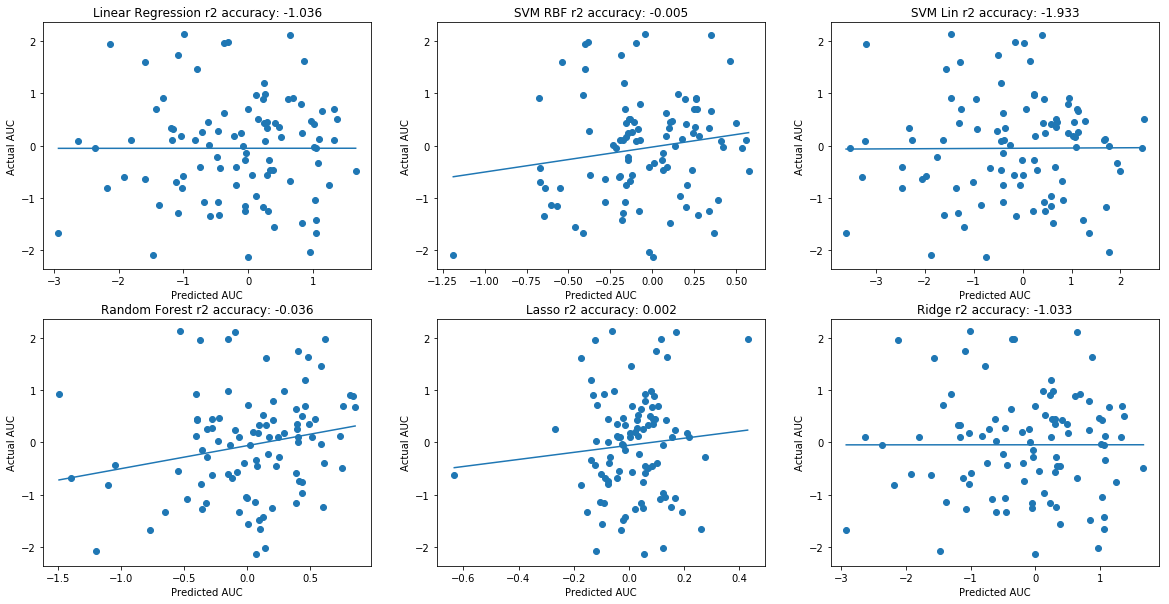

In [37]:
selection_scaled = preprocessing.scale(master_no_auc_selected_clean)
auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(selection_scaled, auc_scaled, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_cn, r2_linreg_cn = test_model (linreg)
svr_rbf_y_pred_cn, r2_svr_rbf_cn = test_model (svr_rbf)
svr_lin_y_pred_cn, r2_svr_lin_cn = test_model (svr_lin)
rf_y_pred_cn, r2_rf_cn = test_model (rf)
y_pred_lasso_cn, r2_lasso_cn = test_model (lasso)
y_pred_ridge_cn, r2_ridge_cn = test_model (ridge)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_cn, "Linear Regression", r2_linreg_cn)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_cn, "SVM RBF", r2_svr_rbf_cn)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_cn, "SVM Lin", r2_svr_lin_cn)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_cn, "Random Forest", r2_rf_cn)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_cn, "Lasso", r2_lasso_cn)
ax[1,2] = draw_plot (ax[1,2], y_pred_ridge_cn, "Ridge", r2_ridge_cn)